In [1]:
import pandas as pd
import numpy as np
import json
from loguru import logger
#from sktime.transformations.series.summarize import WindowSummarizer
#from pycaret.time_series import *

In [2]:
base_1201=r"C:\Users\jetin\Python_Códigos\API2_fluxo_logistico\Sprint 3\base_hist_1201_URF.csv"
#base_9306=r"C:\Users\jetin\Python_Códigos\API2_fluxo_logistico\Sprint 3\base_hist_9306_URF.csv"

In [3]:
dict_type={'CO_ANO': str,
           'CO_MES': str,
           'CO_SH4': str,
           'CO_NCM': str,
           'SG_UF_NCM': str,
           'NO_URF2': str,
           'VL_FOB': float,
           'NO_VIA': str,
           'NO_PAIS': str,
           'KG_LIQUIDO': float,
           'CADEIA PRODUTIVA': str }

In [4]:
df_1201=pd.read_csv(base_1201, sep=",", dtype=dict_type)
#df_9306=pd.read_csv(base_9306, sep=",", dtype=dict_type)

In [5]:
df_1201.loc[(df_1201['CO_SH4']=='1201') & (df_1201['NO_PAIS']=='Argentina')]['NO_VIA'].value_counts()

MARITIMA          128
AEREA              80
FLUVIAL            74
RODOVIARIA         57
MEIOS PROPRIOS      1
Name: NO_VIA, dtype: int64

In [6]:
cols=['CO_ANO',
      'CO_MES',
      'CO_NCM',
      'NO_PAIS',
      'KG_LIQUIDO']

df_1201_sel=df_1201[cols]

In [7]:
df_1201_sel.head(2)

,CO_ANO,CO_MES,CO_NCM,NO_PAIS,KG_LIQUIDO
0,2023,04,12019000,China,260513154.0
1,2023,03,12019000,Espanha,680218.0


In [8]:
df_1201_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30012 entries, 0 to 30011
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CO_ANO      30012 non-null  object 
 1   CO_MES      30012 non-null  object 
 2   CO_NCM      30012 non-null  object 
 3   NO_PAIS     30012 non-null  object 
 4   KG_LIQUIDO  30012 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


#### Tratamento da base

In [9]:
df_1201_sel['DATA_ANO_MES']= df_1201_sel['CO_ANO'] + '-' + df_1201_sel['CO_MES']

C:\Users\jetin\AppData\Local\Temp\ipykernel_3460\4283656739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1201_sel['DATA_ANO_MES']= df_1201_sel['CO_ANO'] + '-' + df_1201_sel['CO_MES']


In [10]:
df_1201_sel['DATA']=pd.to_datetime(df_1201_sel['DATA_ANO_MES'], format= '%Y-%m')

C:\Users\jetin\AppData\Local\Temp\ipykernel_3460\3261627010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1201_sel['DATA']=pd.to_datetime(df_1201_sel['DATA_ANO_MES'], format= '%Y-%m')


In [11]:
df_1201_sel['SKU_DESTINO']= df_1201_sel['CO_NCM'] + '-' + df_1201_sel['NO_PAIS']

C:\Users\jetin\AppData\Local\Temp\ipykernel_3460\3594350525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1201_sel['SKU_DESTINO']= df_1201_sel['CO_NCM'] + '-' + df_1201_sel['NO_PAIS']


In [29]:
df_1201_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30012 entries, 0 to 30011
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CO_ANO        30012 non-null  object        
 1   CO_MES        30012 non-null  object        
 2   CO_NCM        30012 non-null  object        
 3   NO_PAIS       30012 non-null  object        
 4   KG_LIQUIDO    30012 non-null  float64       
 5   DATA_ANO_MES  30012 non-null  object        
 6   DATA          30012 non-null  datetime64[ns]
 7   SKU_DESTINO   30012 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 1.8+ MB


#### Preenche com zero os valores ausentes de data

In [13]:
def preenche_nans(df: pd.DataFrame, metodo: str):
    """
    Preenche os valores ausentes em um DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        O DataFrame de entrada.
    metodo : str
        O método a ser usado para preencher os valores ausentes. Pode ser 'ffill', 'bfill' ou 'fillna_zeros'.

    Returns
    -------
    pd.DataFrame
        O DataFrame com os valores ausentes preenchidos.

    Raises
    ------
    ValueError
        Se o método fornecido não for suportado.

    Example
    -------
    >>> df = preenche_nans(df, 'fillna_zeros')
    """
    metodos = {
        'ffill': df.ffill,
        'bfill': df.bfill,
        'fillna_zeros': df.fillna
    }
    
    if metodo not in metodos:
        raise ValueError("Método não suportado: escolha entre 'ffill', 'bfill' ou 'fillna_zeros'")
    if metodo == 'fillna_zeros':
        return metodos[metodo](0)
    
    return metodos[metodo]()

def agrupa_silver(silver_consolidada: pd.DataFrame, params: dict):
    """
    Realiza groupby na silver consolidada e agrega os dados.

    Parameters
    ----------
    silver_consolidada : pd.DataFrame
        O DataFrame da silver consolidada.
    params : dict
        Um dicionário com parâmetros do cliente.

    Returns
    -------
    pd.DataFrame
        A silver consolidada após a agregação.

    Example
    -------
    >>> params = {
    ...     'colunas_gb': ['coluna1', 'coluna2'],
    ...     'join_colunas_var': '-',
    ...     'coluna_data': 'data',
    ...     'frequencia_agrupamento': 'M',
    ...     'agg_dict': {'coluna3': 'mean', 'coluna4': 'sum'}
    ... }
    >>> silver_agrupada = agrupa_silver(silver_consolidada, params)
    """
    logger.info("Agrupando dados da silver...")
    nome_colunas = '-'.join(params['colunas_gb'])
    silver_consolidada[nome_colunas] = silver_consolidada[params['colunas_gb']].apply(lambda x: params['join_colunas_var'].join(x), axis=1)
    
    gb_args = [nome_colunas] + [pd.Grouper(key=params['coluna_data'], 
                                           freq=params['frequencia_agrupamento'])]

    silver_agrupada = silver_consolidada.groupby(gb_args).agg(params['agg_dict']).reset_index()

    return silver_agrupada

def insere_datas_ausentes(df: pd.DataFrame, params: dict):
    """
    Insere linhas de datas ausentes em um DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        O DataFrame de entrada.
    params : dict
        Um dicionário com parâmetros do cliente.

    Returns
    -------
    pd.DataFrame
        O DataFrame com as datas ausentes preenchidas.

    Example
    -------
    >>> params = {
    ...     'colunas_gb': ['coluna1', 'coluna2'],
    ...     'coluna_data': 'data',
    ...     'frequencia_agrupamento': 'D'
    ... }
    >>> df_com_datas = insere_datas_ausentes(df, params)
    """
    logger.info('Inserindo datas faltantes...')
    col = '-'.join(params['colunas_gb'])
    dfs = []
    data_max = df[params['coluna_data']].max()
    for item in df[col].unique():
        temp = df[df[col] == item].copy()
        temp.set_index(params['coluna_data'], inplace=True)
        complete_date_range = pd.date_range(start=temp.index.min(), 
                                            end=data_max, 
                                            freq=params['frequencia_agrupamento'])

        temp = temp.reindex(complete_date_range)
        temp[col] = temp[col].ffill()
        temp = preenche_nans(temp, metodo='fillna_zeros')
        dfs.append(temp)

    df_com_datas = pd.concat(dfs).reset_index().rename(columns={'index': params['coluna_data']})
    return df_com_datas

def gera_serie_temporal(df: pd.DataFrame, params: dict):
    """
    Função principal para gerar uma série temporal.

    Parameters
    ----------
    df : pd.DataFrame
        O DataFrame de entrada.
    params : dict
        Um dicionário com parâmetros do cliente.

    Returns
    -------
    pd.DataFrame
        A série temporal gerada.

    Example
    -------
    >>> params = {
    ...     'colunas_gb': ['coluna1', 'coluna2'],
    ...     'join_colunas_var': '-',
    ...     'coluna_data': 'data',
    ...     'frequencia_agrupamento': 'D',
    ...     'agg_dict': {'coluna3': 'mean', 'coluna4': 'sum'}
    ... }
    >>> st = gera_serie_temporal(df, params)
    """
    st = agrupa_silver(df, params)
    st = insere_datas_ausentes(st, params)
    logger.success("Série temporal gerada")

    return st


In [14]:
params = {
'colunas_gb': ['SKU_DESTINO'],
'join_colunas_var': '-',
'coluna_data': 'DATA',
'frequencia_agrupamento': 'MS',
'agg_dict': {'KG_LIQUIDO': 'sum'}
 }

In [15]:
df_st_1201=gera_serie_temporal(df_1201_sel, params)

2023-11-25 18:29:35.257 | INFO     | __main__:agrupa_silver:66 - Agrupando dados da silver...
C:\Users\jetin\AppData\Local\Temp\ipykernel_3460\569256599.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silver_consolidada[nome_colunas] = silver_consolidada[params['colunas_gb']].apply(lambda x: params['join_colunas_var'].join(x), axis=1)
2023-11-25 18:29:35.517 | INFO     | __main__:insere_datas_ausentes:102 - Inserindo datas faltantes...
2023-11-25 18:29:36.617 | SUCCESS  | __main__:gera_serie_temporal:150 - Série temporal gerada


In [31]:
df_st_1201.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATA         45528 non-null  datetime64[ns]
 1   SKU_DESTINO  45528 non-null  object        
 2   KG_LIQUIDO   45528 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.0+ MB


#### Predição serie temporal

In [52]:
df_st_1201_ARG = df_st_1201.loc[df_st_1201['SKU_DESTINO'].apply(lambda x: '12019000-Argentina' in x)].reset_index().drop(columns=['index','SKU_DESTINO'])

In [53]:
df_st_1201_ARG

,DATA,KG_LIQUIDO
0,2013-02-01,1.160000e+05
1,2013-03-01,4.380000e+05
2,2013-04-01,1.160000e+05
3,2013-05-01,4.800000e+04
4,2013-06-01,0.000000e+00
...,...,...
121,2023-03-01,3.566155e+08
122,2023-04-01,5.386466e+08
123,2023-05-01,9.685269e+08
124,2023-06-01,1.125314e+09


In [ ]:
#gera_predicao_serie_temporal(df_1201_china, params_predicao, params_serie_temporal)

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [54]:
# Converta a coluna de datas para o tipo apropriado
df_st_1201_ARG.set_index('DATA', inplace=True)

In [55]:
# Treine o modelo AutoARIMA até a última data disponível
modelo_autoarima = auto_arima(df_st_1201_ARG, start_p=1, start_q=1, max_p=3, max_q=3, m=12, seasonal=True, trace=True)
modelo = SARIMAX(df_st_1201_ARG, order=modelo_autoarima.order, seasonal_order=modelo_autoarima.seasonal_order)
resultado = modelo.fit(disp=False)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=4510.404, Time=0.35 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=4624.094, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4509.199, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4545.509, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=4628.422, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=4508.211, Time=0.03 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=4507.857, Time=0.11 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=4509.780, Time=0.22 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=4509.687, Time=0.33 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=4510.942, Time=0.50 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=4626.017, Time=0.11 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=4509.599, Time=0.18 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=4508.585, Time=0.28 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=4509.996, Time=0.32 sec
 ARIMA(1,0,0)(0,1,1

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [56]:
# Faça previsões a partir da última data no conjunto de dados
passos_para_prever = 24  # ou o número desejado de passos à frente
previsoes = resultado.get_forecast(steps=passos_para_prever)
previsao_intervalo = previsoes.conf_int()

In [58]:
# Crie um DataFrame com as datas futuras e as previsões
datas_futuras = pd.date_range(start=df_st_1201_ARG.index[-1], periods=passos_para_prever+1, freq='M')[1:]
df_PRED_ARG = pd.DataFrame(index=datas_futuras, columns=['KG_LIQUIDO_PRED', 'IF_KG_LIQUIDO_PRED', 'IS_KG_LIQUIDO_PRED'])
df_PRED_ARG['KG_LIQUIDO_PRED'] = previsoes.predicted_mean.values
df_PRED_ARG[['IF_KG_LIQUIDO_PRED', 'IS_KG_LIQUIDO_PRED']] = previsao_intervalo.values

In [59]:
# Exiba as previsões
df_PRED_ARG

,KG_LIQUIDO_PRED,IF_KG_LIQUIDO_PRED,IS_KG_LIQUIDO_PRED
2023-08-31,3.853597e+08,2.051469e+08,5.655725e+08
2023-09-30,3.106368e+08,7.484527e+07,5.464283e+08
2023-10-31,2.540922e+08,-1.434416e+07,5.225285e+08
2023-11-30,2.132986e+08,-7.614342e+07,5.027406e+08
2023-12-31,1.799723e+08,-1.235396e+08,4.834842e+08
2024-01-31,1.518664e+08,-1.612772e+08,4.650099e+08
2024-02-29,3.476276e+08,2.780368e+07,6.674516e+08
2024-03-31,3.011398e+08,-2.335629e+07,6.256359e+08
2024-04-30,3.804338e+08,5.265215e+07,7.082155e+08
2024-05-31,5.919697e+08,2.618688e+08,9.220706e+08


In [62]:
df_st_1201_ARG.head()

,KG_LIQUIDO
DATA,
2013-02-01,116000.0
2013-03-01,438000.0
2013-04-01,116000.0
2013-05-01,48000.0
2013-06-01,0.0


In [63]:
df_1201_ARG_2020 = df_st_1201_ARG.loc['2020-01-01':]

In [45]:
import matplotlib.pyplot as plt

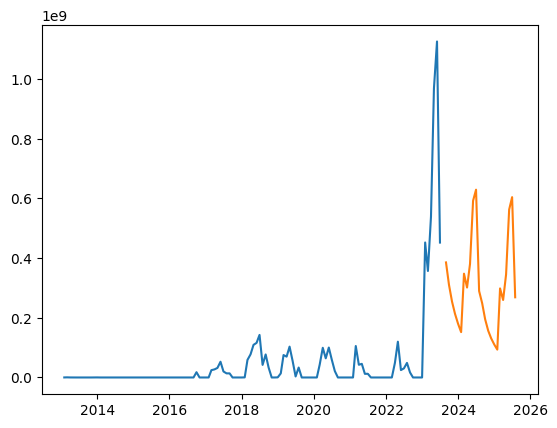

In [61]:
plt.plot(df_st_1201_ARG)
plt.plot(df_PRED_ARG['KG_LIQUIDO_PRED'])
plt.show()

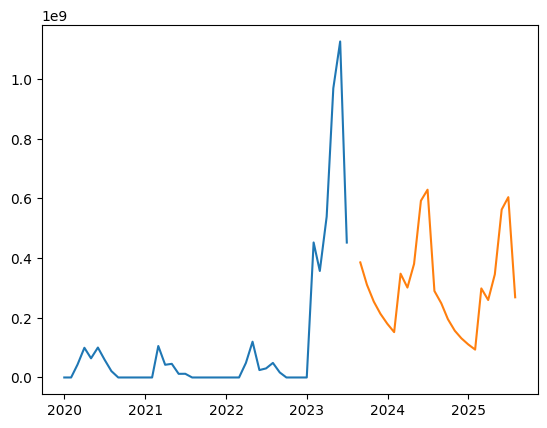

In [64]:
plt.plot(df_1201_ARG_2020)
plt.plot(df_PRED_ARG['KG_LIQUIDO_PRED'])
plt.show()

In [ ]:
|SH4|DESTINO|DATA FUTURO|QTDADE ESPERADA|

In [66]:
df_1201.head(2)

,CO_ANO,CO_MES,CO_SH4,NO_SH4_POR,CO_NCM,NO_NCM_POR,NO_ISIC_SECAO,SG_UF_NCM,NO_URF2,LAT,LONG,NO_ISIC_CLASSE,VL_FOB,NO_VIA,TIPO,NO_PAIS,KG_LIQUIDO,SG_UNID,CADEIA PRODUTIVA
0,2023,04,1201,Soja; mesmo triturada,12019000,"Soja, mesmo triturada, exceto para semeadura",Agropecuária,BA,ALF - SALVADOR,-21.923333,-46.391856,"Cultivo de cereais (exceto arroz), leguminosas...",139576595.0,MARITIMA,EXPORTAÇÃO,China,260513154.0,TML,Agronegócio
1,2023,03,1201,Soja; mesmo triturada,12019000,"Soja, mesmo triturada, exceto para semeadura",Agropecuária,PA,ALF - BELÉM,-1.456343,-48.501299,"Cultivo de cereais (exceto arroz), leguminosas...",382972.0,MARITIMA,EXPORTAÇÃO,Espanha,680218.0,TML,Agronegócio


In [67]:
chave_exp=['CO_MES','CO_SH4','NO_PAIS','NO_VIA']
var_int_exp=['KG_LIQUIDO']

df_1201_classif_group = df_1201.groupby(chave_exp)[var_int_exp].sum().reset_index()

In [70]:
df_1201_classif_group.head(2)

,CO_MES,CO_SH4,NO_PAIS,NO_VIA,KG_LIQUIDO
0,01,1201,Alemanha,FLUVIAL,691417.0
1,01,1201,Alemanha,MARITIMA,229700942.0


In [ ]:
#df_1201_classif = df_1201[['CO_MES','CO_SH4','NO_PAIS','NO_VIA','KG_LIQUIDO']]

In [ ]:
#df_1201_classif=df_1201_classif.loc[df_1201_classif['NO_PAIS']=='Argentina']

In [69]:
from sklearn.preprocessing import LabelEncoder

In [71]:
# Initialize LabelEncoder
label_encoder_mes = LabelEncoder()

df_1201_classif_group['CO_MES_encoded'] = label_encoder_mes.fit_transform(df_1201_classif_group['CO_MES'])

In [72]:
# Initialize LabelEncoder
label_encoder_sh4 = LabelEncoder()

df_1201_classif_group['CO_SH4_encoded'] = label_encoder_sh4.fit_transform(df_1201_classif_group['CO_SH4'])

In [73]:
# Initialize LabelEncoder
label_encoder_pais = LabelEncoder()

df_1201_classif_group['NO_PAIS_encoded'] = label_encoder_pais.fit_transform(df_1201_classif_group['NO_PAIS'])

In [74]:
# Initialize LabelEncoder
label_encoder_via = LabelEncoder()

df_1201_classif_group['NO_VIA_encoded'] = label_encoder_via.fit_transform(df_1201_classif_group['NO_VIA'])

In [76]:
df_1201_classif_group.head()

,CO_MES,CO_SH4,NO_PAIS,NO_VIA,KG_LIQUIDO,CO_MES_encoded,CO_SH4_encoded,NO_PAIS_encoded,NO_VIA_encoded
0,01,1201,Alemanha,FLUVIAL,691417.0,0,0,1,3
1,01,1201,Alemanha,MARITIMA,229700942.0,0,0,1,5
2,01,1201,Angola,MARITIMA,22060.0,0,0,2,5
3,01,1201,Argentina,AEREA,704.0,0,0,5,0
4,01,1201,Argentina,RODOVIARIA,1069340.0,0,0,5,7


In [77]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [78]:
X = df_1201_classif_group[['KG_LIQUIDO', 'CO_MES_encoded', 'CO_SH4_encoded', 'NO_PAIS_encoded']]
y = df_1201_classif_group['NO_VIA_encoded']

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Instantiate XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective="multi:softmax", random_state=42)

In [81]:
# Train the classifier
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [82]:
# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

In [83]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


In [85]:
X_test.head(2)

,KG_LIQUIDO,CO_MES_encoded,CO_SH4_encoded,NO_PAIS_encoded
319,4919985.0,3,0,57
956,50748368.0,9,0,32


In [86]:
df_final = df_PRED_ARG.reset_index()

In [87]:
df_final['CO_MES']=df_final['index'].dt.strftime('%m')

In [95]:
df_final.rename(columns={'KG_LIQUIDO_PRED' : 'KG_LIQUIDO'}, inplace=True)

In [96]:
df_final['CO_SH4']='1201'
df_final['NO_PAIS']='Argentina'

In [97]:
df_final.head(2)

,index,KG_LIQUIDO,IF_KG_LIQUIDO_PRED,IS_KG_LIQUIDO_PRED,CO_MES,CO_SH4,NO_PAIS,CO_MES_encoded,CO_SH4_encoded,NO_PAIS_encoded
0,2023-08-31,3.853597e+08,2.051469e+08,5.655725e+08,08,1201,Argentina,7,0,5
1,2023-09-30,3.106368e+08,7.484527e+07,5.464283e+08,09,1201,Argentina,8,0,5


In [ ]:
#df_final.drop(columns=['index','Intervalo Inferior','Intervalo Superior'], inplace=True)

In [98]:
df_final['CO_MES_encoded']=label_encoder_mes.transform(df_final['CO_MES'])

In [99]:
df_final['CO_SH4_encoded']=label_encoder_sh4.transform(df_final['CO_SH4'])

In [100]:
df_final['NO_PAIS_encoded']=label_encoder_pais.transform(df_final['NO_PAIS'])

In [101]:
df_final[['KG_LIQUIDO','CO_MES_encoded','CO_SH4_encoded','NO_PAIS_encoded']].head()

,KG_LIQUIDO,CO_MES_encoded,CO_SH4_encoded,NO_PAIS_encoded
0,3.853597e+08,7,0,5
1,3.106368e+08,8,0,5
2,2.540922e+08,9,0,5
3,2.132986e+08,10,0,5
4,1.799723e+08,11,0,5


In [102]:
df_final['VIA_PRED']=xgb_classifier.predict(df_final[['KG_LIQUIDO','CO_MES_encoded','CO_SH4_encoded','NO_PAIS_encoded']])

In [103]:
df_final['VIA_PRED_PROB']=xgb_classifier.predict_proba(df_final[['KG_LIQUIDO','CO_MES_encoded','CO_SH4_encoded','NO_PAIS_encoded']]).max(axis=1)

In [104]:
df_final['NO_VIA_PRED']=label_encoder_via.inverse_transform(df_final['VIA_PRED'])

In [105]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [107]:
df_1201_final = df_final[['NO_PAIS','index','KG_LIQUIDO','IF_KG_LIQUIDO_PRED','IS_KG_LIQUIDO_PRED','NO_VIA_PRED','VIA_PRED_PROB']]

In [109]:
df_1201_final['CO_SH4']='1201'
df_1201_final['NO_SH4_POR']='Soja; mesmo triturada'
df_1201_final['NO_ISIC_SECAO']='Agropecuária'
df_1201_final['NO_ISIC_CLASSE']='Cultivo de cereais (exceto arroz), leguminosas e oleaginosas'
df_1201_final['SG_UNID']='TML'
df_1201_final['CADEIA PRODUTIVA']='Agronegócio'

C:\Users\jetin\AppData\Local\Temp\ipykernel_3460\2314679246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1201_final['CO_SH4']='1201'
C:\Users\jetin\AppData\Local\Temp\ipykernel_3460\2314679246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1201_final['NO_SH4_POR']='Soja; mesmo triturada'
C:\Users\jetin\AppData\Local\Temp\ipykernel_3460\2314679246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [111]:
df_1201_final.head()

,NO_PAIS,index,KG_LIQUIDO,IF_KG_LIQUIDO_PRED,IS_KG_LIQUIDO_PRED,NO_VIA_PRED,VIA_PRED_PROB,CO_SH4,NO_SH4_POR,NO_ISIC_SECAO,NO_ISIC_CLASSE,SG_UNID,CADEIA PRODUTIVA
0,Argentina,2023-08-31,385359656.701,205146859.889,565572453.514,MARITIMA,0.970,1201,Soja; mesmo triturada,Agropecuária,"Cultivo de cereais (exceto arroz), leguminosas...",TML,Agronegócio
1,Argentina,2023-09-30,310636775.409,74845271.002,546428279.817,MARITIMA,0.978,1201,Soja; mesmo triturada,Agropecuária,"Cultivo de cereais (exceto arroz), leguminosas...",TML,Agronegócio
2,Argentina,2023-10-31,254092177.382,-14344159.084,522528513.847,MARITIMA,0.989,1201,Soja; mesmo triturada,Agropecuária,"Cultivo de cereais (exceto arroz), leguminosas...",TML,Agronegócio
3,Argentina,2023-11-30,213298599.692,-76143415.375,502740614.759,MARITIMA,0.991,1201,Soja; mesmo triturada,Agropecuária,"Cultivo de cereais (exceto arroz), leguminosas...",TML,Agronegócio
4,Argentina,2023-12-31,179972302.818,-123539585.890,483484191.525,MARITIMA,0.990,1201,Soja; mesmo triturada,Agropecuária,"Cultivo de cereais (exceto arroz), leguminosas...",TML,Agronegócio


In [112]:
# salvando base SP - NCM - URF
df_1201_final.to_csv('base_1201_final.csv', index=False)